<a href="https://colab.research.google.com/github/kashish049/Machine-learning-assignments/blob/main/Instance_based_learing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving 3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69.xlsx to 3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69.xlsx


In [ ]:
import pandas as pd

# Load the dataset from the uploaded file
df = pd.read_excel('3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69.xlsx')

# Check the first few rows to ensure it loaded correctly
print(df.head())


  country           state       city                              station  \
0   India  Andhra_Pradesh  Amaravati       Secretariat, Amaravati - APPCB   
1   India  Andhra_Pradesh  Amaravati       Secretariat, Amaravati - APPCB   
2   India  Andhra_Pradesh  Anantapur         Gulzarpet, Anantapur - APPCB   
3   India  Andhra_Pradesh   Chittoor  Gangineni Cheruvu, Chittoor - APPCB   
4   India  Andhra_Pradesh     Kadapa      Yerramukkapalli, Kadapa - APPCB   

          last_update   latitude  longitude pollutant_id  pollutant_min  \
0 2024-07-08 11:00:00  16.515083  80.518167          NH3            2.0   
1 2024-07-08 11:00:00  16.515083  80.518167          SO2           21.0   
2 2024-07-08 11:00:00  14.675886  77.593027         PM10           58.0   
3 2024-07-08 11:00:00  13.204880  79.097889          NO2            7.0   
4 2024-07-08 11:00:00  14.465052  78.824187         PM10            NaN   

   pollutant_max  pollutant_avg  
0            4.0            3.0  
1           24.0  

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing pollutant_avg
df = df.dropna(subset=['pollutant_avg'])

# Encode pollutant_id as numerical values
label_encoder = LabelEncoder()
df['pollutant_id_encoded'] = label_encoder.fit_transform(df['pollutant_id'])

# Select features and normalize them
features = df[['pollutant_id_encoded', 'pollutant_avg']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


country                  0
state                    0
city                     0
station                  0
        last_update      0
latitude                 0
longitude                0
pollutant_id             0
pollutant_min          346
pollutant_max          346
pollutant_avg          346
dtype: int64


<ipython-input-13-adfefc3ba784>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pollutant_id_encoded'] = label_encoder.fit_transform(df['pollutant_id'])


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Handle missing values by dropping rows with missing pollutant_avg
df_clean = df.dropna(subset=['pollutant_avg'])

# , fill missing values with the column median
# df['pollutant_avg'].fillna(df['pollutant_avg'].median(), inplace=True)

# Encode pollutant_id as numerical values
label_encoder = LabelEncoder()
df_clean['pollutant_id_encoded'] = label_encoder.fit_transform(df_clean['pollutant_id'])

# Select features and normalize them
features = df_clean[['pollutant_id_encoded', 'pollutant_avg']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Display the number of missing values after handling
print("Missing values after handling:")
print(df_clean.isnull().sum())

Missing values before handling:
country                 0
state                   0
city                    0
station                 0
        last_update     0
latitude                0
longitude               0
pollutant_id            0
pollutant_min           0
pollutant_max           0
pollutant_avg           0
pollutant_id_encoded    0
dtype: int64
Missing values after handling:
country                 0
state                   0
city                    0
station                 0
        last_update     0
latitude                0
longitude               0
pollutant_id            0
pollutant_min           0
pollutant_max           0
pollutant_avg           0
pollutant_id_encoded    0
dtype: int64


In [ ]:
# Define threshold for dangerous pollution levels
threshold = 45  # Example threshold, adjust based on domain knowledge

# Create target variable
df['pollution_level'] = df['pollutant_avg'].apply(lambda x: 'dangerous' if x > threshold else 'acceptable')

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['pollution_level'])


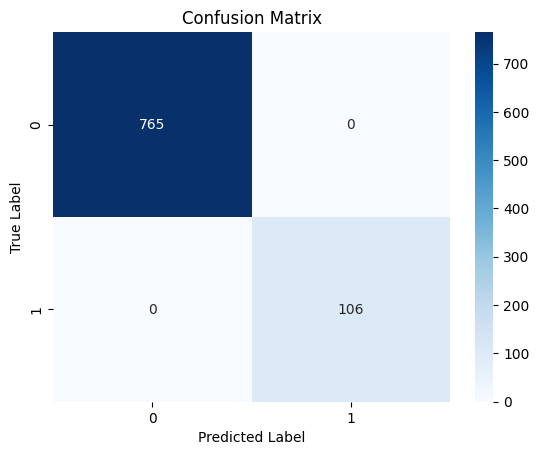

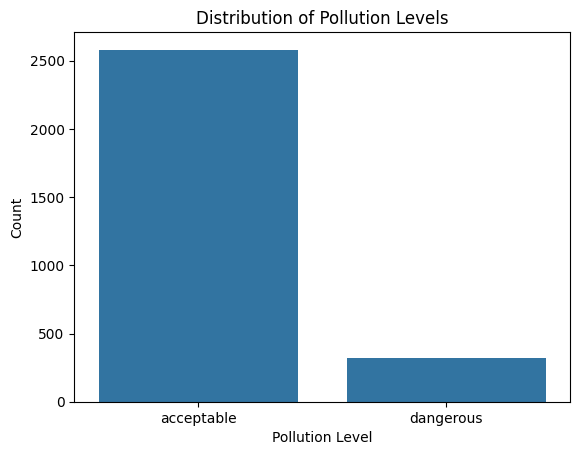

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize the distribution of pollution levels
sns.countplot(x='pollution_level', data=df)
plt.title('Distribution of Pollution Levels')
plt.xlabel('Pollution Level')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, y, test_size=0.3, random_state=42)

# Initialize K-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Choose k as 5, you can experiment with different values

# Train the model
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[765   0]
 [  0 106]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       765
           1       1.00      1.00      1.00       106

    accuracy                           1.00       871
   macro avg       1.00      1.00      1.00       871
weighted avg       1.00      1.00      1.00       871

